PRE PROCESSING USING MAIZE PLANT

Extracting plant from it's background

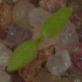

In [2]:
from PIL import Image
import cv2
from matplotlib import pyplot as plt


Image.open('C:\\Users\\Annie\\Downloads\\Common Chickweed\\243.png')

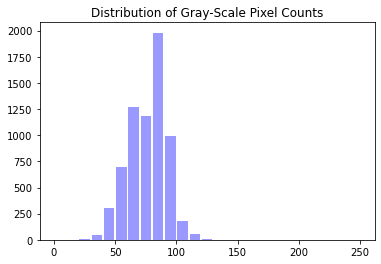

In [3]:
test_img_path='C:\\Users\\Annie\\Downloads\\Common Chickweed\\243.png'
gs=cv2.imread(test_img_path)
gray_im = cv2.cvtColor(gs, cv2.COLOR_BGR2GRAY)
grayscale_pixels = []
for i in range(len(gray_im)): 
    grayscale_pixels += list(gray_im[i].flatten())

plt.hist(grayscale_pixels, bins=[i for i in range(0, 256, 10)], color='b', alpha=0.4, rwidth=0.85)
plt.title('Distribution of Gray-Scale Pixel Counts')
plt.show()


In [4]:
import cv2
img =  cv2.imread('C:\\Users\\Annie\\Downloads\\Common Chickweed\\243.png')
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# find the green color 
mask_green = cv2.inRange(hsv, (36,0,0), (86,255,255))

# find any green in the image
mask = cv2.bitwise_or(mask_green, mask_green)

# Bitwise-AND mask and original image
res = cv2.bitwise_and(img,img, mask= mask)

cv2.imshow("original", img)
cv2.imshow("final image", res)
cv2.waitKey(0)
cv2.destroyAllWindows()



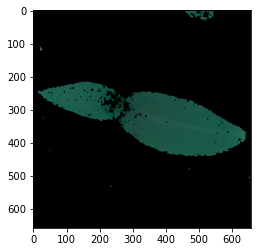

In [159]:
from matplotlib import pyplot as plt
plt.imshow(res)
plt.imsave('final image.png', res)

LEAF COUNT

In [5]:
import numpy as np
import pandas as pd
import os
import datetime
import pickle
from PIL import Image

import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [6]:
test_img_path ='C:\\Users\\Annie\\final image.png'
test_img_path

'C:\\Users\\Annie\\final image.png'

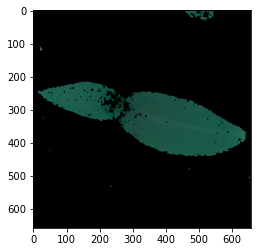

In [7]:
#Reading the image
main_img = cv2.imread(test_img_path)
img = cv2.cvtColor(main_img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

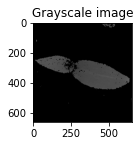

In [8]:
# Convert image in grayscale
gray_im = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.subplot(221)
plt.title('Grayscale image')
plt.imshow(gray_im, cmap="gray", vmin=0, vmax=255)
plt.imsave('final image1.png', gray_im)

CONTRAST ADJUSTMENT

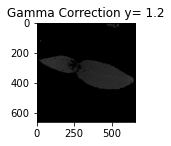

In [9]:
# Contrast adjusting with gamma correction y = 1.2

gray_correct = np.array(255 * (gray_im / 255) ** 1.5 , dtype='uint8')
plt.subplot(222)
plt.title('Gamma Correction y= 1.2')
plt.imshow(gray_correct, cmap="gray", vmin=0, vmax=255)
plt.imsave('final image2.png', gray_correct)

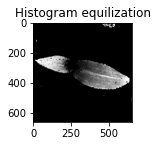

In [10]:
# Contrast adjusting with histogramm equalization
gray_equ = cv2.equalizeHist(gray_im)
plt.subplot(223)
plt.title('Histogram equilization')
plt.imshow(gray_equ, cmap="gray", vmin=0, vmax=255)
plt.imsave('final image3.png', gray_equ)

IMAGE DILATION AND EROSION

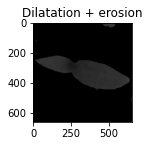

In [11]:
# Dilatation et erosion
kernel = np.ones((15,15), np.uint8)
img_dilation = cv2.dilate(gray_correct, kernel, iterations=1)
img_erode = cv2.erode(img_dilation,kernel, iterations=1)
# clean all noise after dilatation and erosion
img_erode = cv2.medianBlur(img_erode, 7)
plt.subplot(221)
plt.title('Dilatation + erosion')
plt.imshow(img_erode, cmap="gray", vmin=0, vmax=255)
plt.imsave('final image4.png', img_erode)

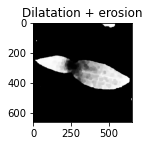

In [12]:
# Dilatation et erosion
kernel = np.ones((15,15), np.uint8)
img_dilation = cv2.dilate(gray_equ, kernel, iterations=1)
img_erode = cv2.erode(img_dilation,kernel, iterations=1)
# clean all noise after dilatation and erosion
img_erode = cv2.medianBlur(img_erode, 7)
plt.subplot(221)
plt.title('Dilatation + erosion')
plt.imshow(img_erode, cmap="gray", vmin=0, vmax=255)
plt.imsave('final image5.png', img_erode)

OBJECT LABELING

objects number is: 5


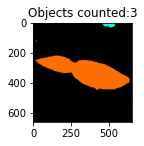

In [13]:
# Labeling

ret, labels = cv2.connectedComponents(img_erode)
label_hue = np.uint8(179 * labels / np.max(labels))
blank_ch = 255 * np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
labeled_img[label_hue == 0] = 0

plt.subplot(222)
plt.title('Objects counted:'+ str(ret-1))
plt.imshow(labeled_img)
print('objects number is:', ret-1)
plt.show()
plt.imsave('final image6.png',labeled_img)

objects number is: 5


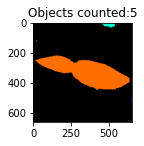

In [14]:
# Labeling

ret, labels = cv2.connectedComponents(img_erode)
label_hue = np.uint8(179 * labels / np.max(labels))
blank_ch = 255 * np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
labeled_img[label_hue == 0] = 0

plt.subplot(222)
plt.title('Objects counted:'+ str(ret-1))
plt.imshow(labeled_img)
print('objects number is:', ret-1)
plt.show()
plt.imsave('final image7.png', labeled_img)

After counting leaves using images generated from gamma correction ,leaf count is 3 and from histogram equalization , leave count is 5.
Therefore count gotten from gamma correction is correct and will be used for our function to preprocess all the chickweed images since the actual leaf count in the maize image used is 3.